# Task lab work # 5
# First Name, Last Name
# Group No

# 1. Chose the dataset with images (FOR CLASSIFICATION) from sugessted or you could prepare own (find in kaggle or create).
Created own dataset gives additional points in the final mark (100-200 images on each class).

## Links on Datasets
* [Cats Vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)
* [caltech101: classification of 101 instances](https://www.tensorflow.org/datasets/catalog/caltech101)
* [same as above but with birds](https://www.tensorflow.org/datasets/catalog/caltech_birds2010)
* [with birds v2](https://www.tensorflow.org/datasets/catalog/caltech_birds2011)
* [cars classification](https://www.tensorflow.org/datasets/catalog/cars196)
* [plant disease classification](https://www.tensorflow.org/datasets/catalog/cassava)
* [CIFAR100: classification of 100 instances of types](https://www.tensorflow.org/datasets/catalog/cifar100)
* [Healthy and Unhealthy citrus leaves](https://www.tensorflow.org/datasets/catalog/citrus_leaves)

# 2. Train the same data (but with different data preparation stages) for Convolutional and Fullyconnected NNs.
0. Prepare you data, download into folders, preproces, rescale, etc.
1. Train fullyconnected NN on your selected dataset in the similar manner to example
2. Train convolutional NN on your selected dataset in the similar manner to example

# Dataset: [Healthy and Unhealthy citrus leaves](https://www.tensorflow.org/datasets/catalog/citrus_leaves)

In [56]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [57]:
(ds_train, ds_test), ds_info = tfds.load(
    'citrus_leaves',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [ ]:
# Define preprocessing function: resize and normalize
IMG_SIZE = (256, 256)

# Function for normalization
def normalize_img(image, label):
	image = tf.image.resize(image, IMG_SIZE)
	image = tf.cast(image, tf.float32) / 255.0
	return image, label

# Preparing for training
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

In [59]:
for image, label in ds_train.take(1):
    print("Image shape:", image.shape)

Image shape: (32, 256, 256, 3)


In [60]:
# 1. Building the FCNN
model_fcnn = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_fcnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
model_fcnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,365,316 (192.13 MB)

 Trainable params: 50,365,316 (192.13 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Training
history_fcnn = model_fcnn.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.3302 - loss: 64.1504 - val_accuracy: 0.5059 - val_loss: 42.4605
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.4685 - loss: 48.6025 - val_accuracy: 0.5059 - val_loss: 38.3055
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.5293 - loss: 28.7214 - val_accuracy: 0.6235 - val_loss: 5.9273
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.5777 - loss: 6.3357 - val_accuracy: 0.5529 - val_loss: 4.1716
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.6163 - loss: 4.7690 - val_accuracy: 0.6353 - val_loss: 3.6246
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.5652 - loss: 4.5456 - val_accuracy: 0.8000 - val_loss: 1.7022
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.7028 - loss: 1.9098 - val_accuracy: 0.8000 - val_loss: 1.2387
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.7655 - loss: 1.5153 - val_accurac

In [63]:
# Extract data
history = history_fcnn  # or whatever your history variable is
epoch_array = range(1, len(history.history['loss']) + 1)

# Normalize loss
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']
acc_array = history.history['accuracy']
val_acc_array = history.history['val_accuracy']

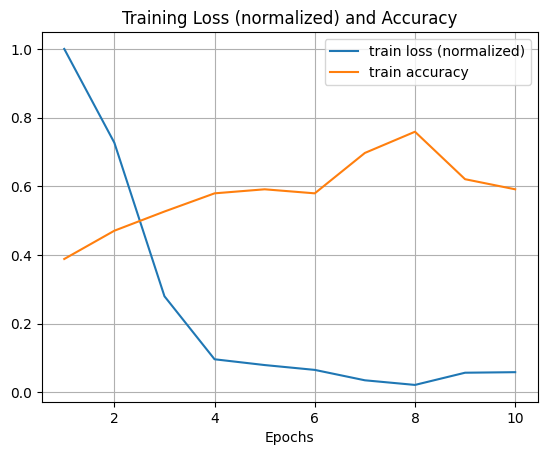

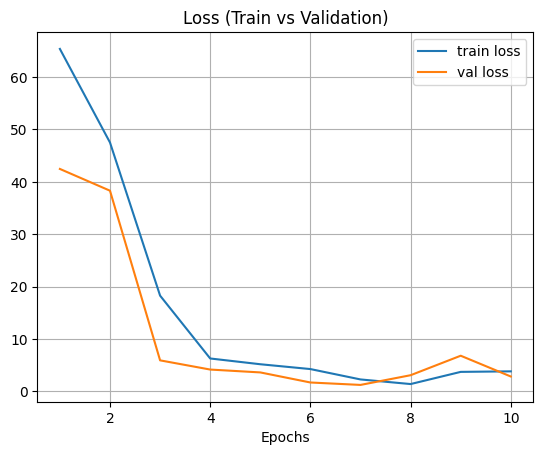

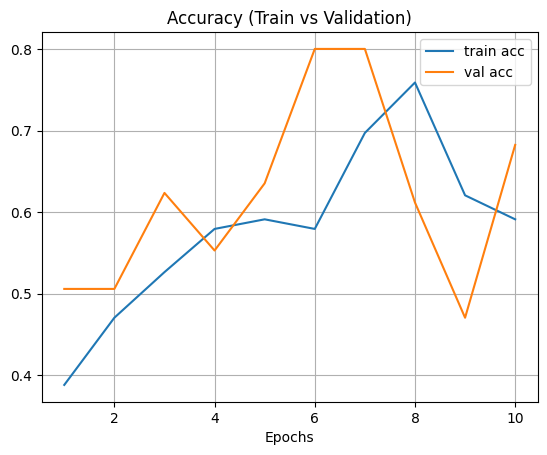

In [64]:
# --- Plot normalized training loss and accuracy
max_loss = max(loss_array)
loss_array_norm = np.array(loss_array) / max_loss

plt.plot(epoch_array, loss_array_norm, label="train loss (normalized)")
plt.plot(epoch_array, acc_array, label="train accuracy")
plt.xlabel("Epochs")
plt.title("Training Loss (normalized) and Accuracy")
plt.legend()
plt.grid()
plt.show()

# --- Plot training and validation loss
plt.plot(epoch_array, loss_array, label="train loss")
plt.plot(epoch_array, val_loss_array, label="val loss")
plt.xlabel("Epochs")
plt.title("Loss (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()

# --- Plot training and validation accuracy
plt.plot(epoch_array, acc_array, label="train acc")
plt.plot(epoch_array, val_acc_array, label="val acc")
plt.xlabel("Epochs")
plt.title("Accuracy (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


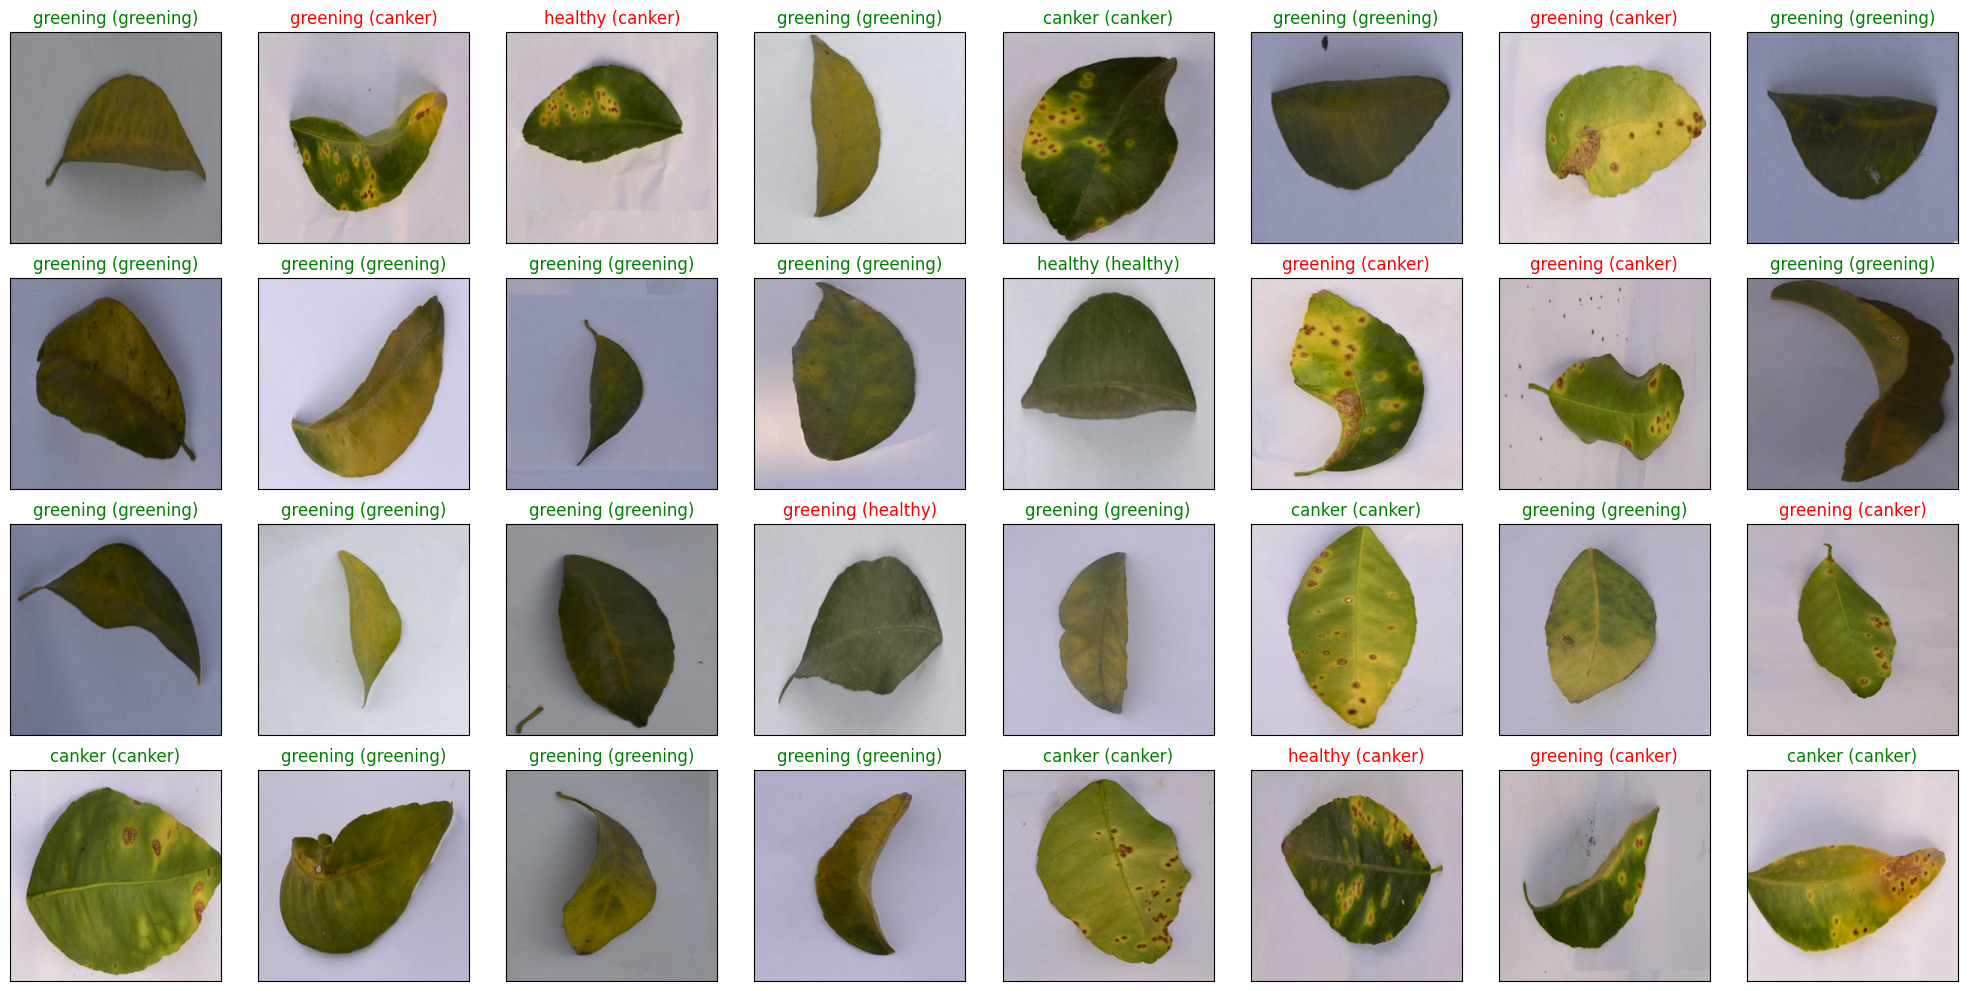

In [65]:
# Get class names
class_names = ds_info.features['label'].names

# Combine the test set into arrays
x_test = np.concatenate([x.numpy() for x, _ in ds_test], axis=0)
y_test = np.concatenate([y.numpy() for _, y in ds_test], axis=0)

# Getting predictions
test_pred = model_fcnn.predict(x_test)

# Visualize
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))
for idx in range(32):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(test_pred[idx])
    true_idx = y_test[idx]
    ax.set_title(f"{class_names[pred_idx]} ({class_names[true_idx]})",
                 color="green" if pred_idx == true_idx else "red")
plt.tight_layout()
plt.show()


In [66]:
# 2. Building the CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
# Training
history_cnn = model_cnn.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 650ms/step - accuracy: 0.3205 - loss: 2.5336 - val_accuracy: 0.5059 - val_loss: 0.9560
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 631ms/step - accuracy: 0.4399 - loss: 1.1373 - val_accuracy: 0.7059 - val_loss: 0.8928
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 662ms/step - accuracy: 0.6341 - loss: 0.9022 - val_accuracy: 0.6824 - val_loss: 0.7267
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 0.6047 - loss: 0.7668 - val_accuracy: 0.6824 - val_loss: 0.6910
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 685ms/step - accuracy: 0.7202 - loss: 0.6529 - val_accuracy: 0.8353 - val_loss: 0.4726
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - accuracy: 0.7929 - loss: 0.5195 - val_accuracy: 0.8471 - val_loss: 0.4660
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 685ms/step - accuracy: 0.8351 - loss: 0.4515 - val_accuracy: 0.8471 - val_loss: 0.4038
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.8422 - loss: 0.4298 - val_accuracy: 0.

In [68]:
# Extract data
epoch_array = range(1, len(history_cnn.history['loss']) + 1)

# Loss and accuracy
loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']
acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']

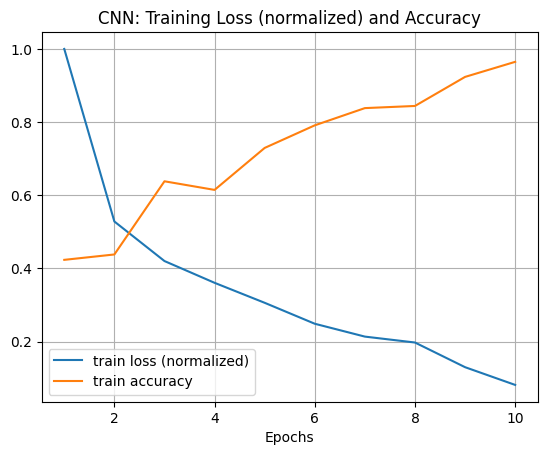

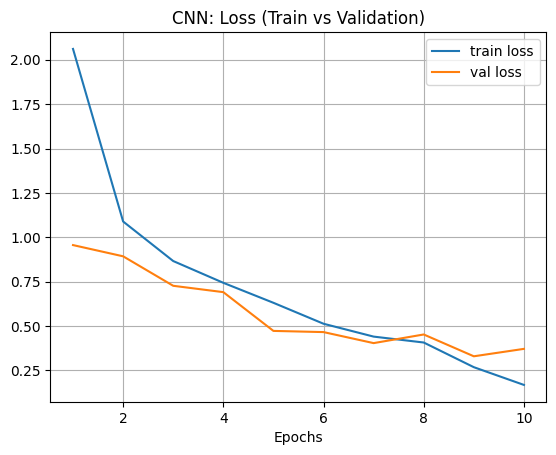

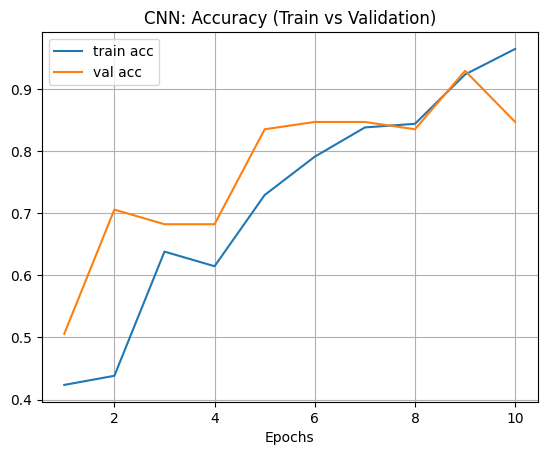

In [69]:
# --- Plot normalized training loss and accuracy
max_loss_cnn = max(loss_cnn)
loss_cnn_norm = np.array(loss_cnn) / max_loss_cnn

plt.plot(epoch_array, loss_cnn_norm, label="train loss (normalized)")
plt.plot(epoch_array, acc_cnn, label="train accuracy")
plt.xlabel("Epochs")
plt.title("CNN: Training Loss (normalized) and Accuracy")
plt.legend()
plt.grid()
plt.show()

# --- Plot training and validation loss
plt.plot(epoch_array, loss_cnn, label="train loss")
plt.plot(epoch_array, val_loss_cnn, label="val loss")
plt.xlabel("Epochs")
plt.title("CNN: Loss (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()

# --- Plot training and validation accuracy
plt.plot(epoch_array, acc_cnn, label="train acc")
plt.plot(epoch_array, val_acc_cnn, label="val acc")
plt.xlabel("Epochs")
plt.title("CNN: Accuracy (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F967226680> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


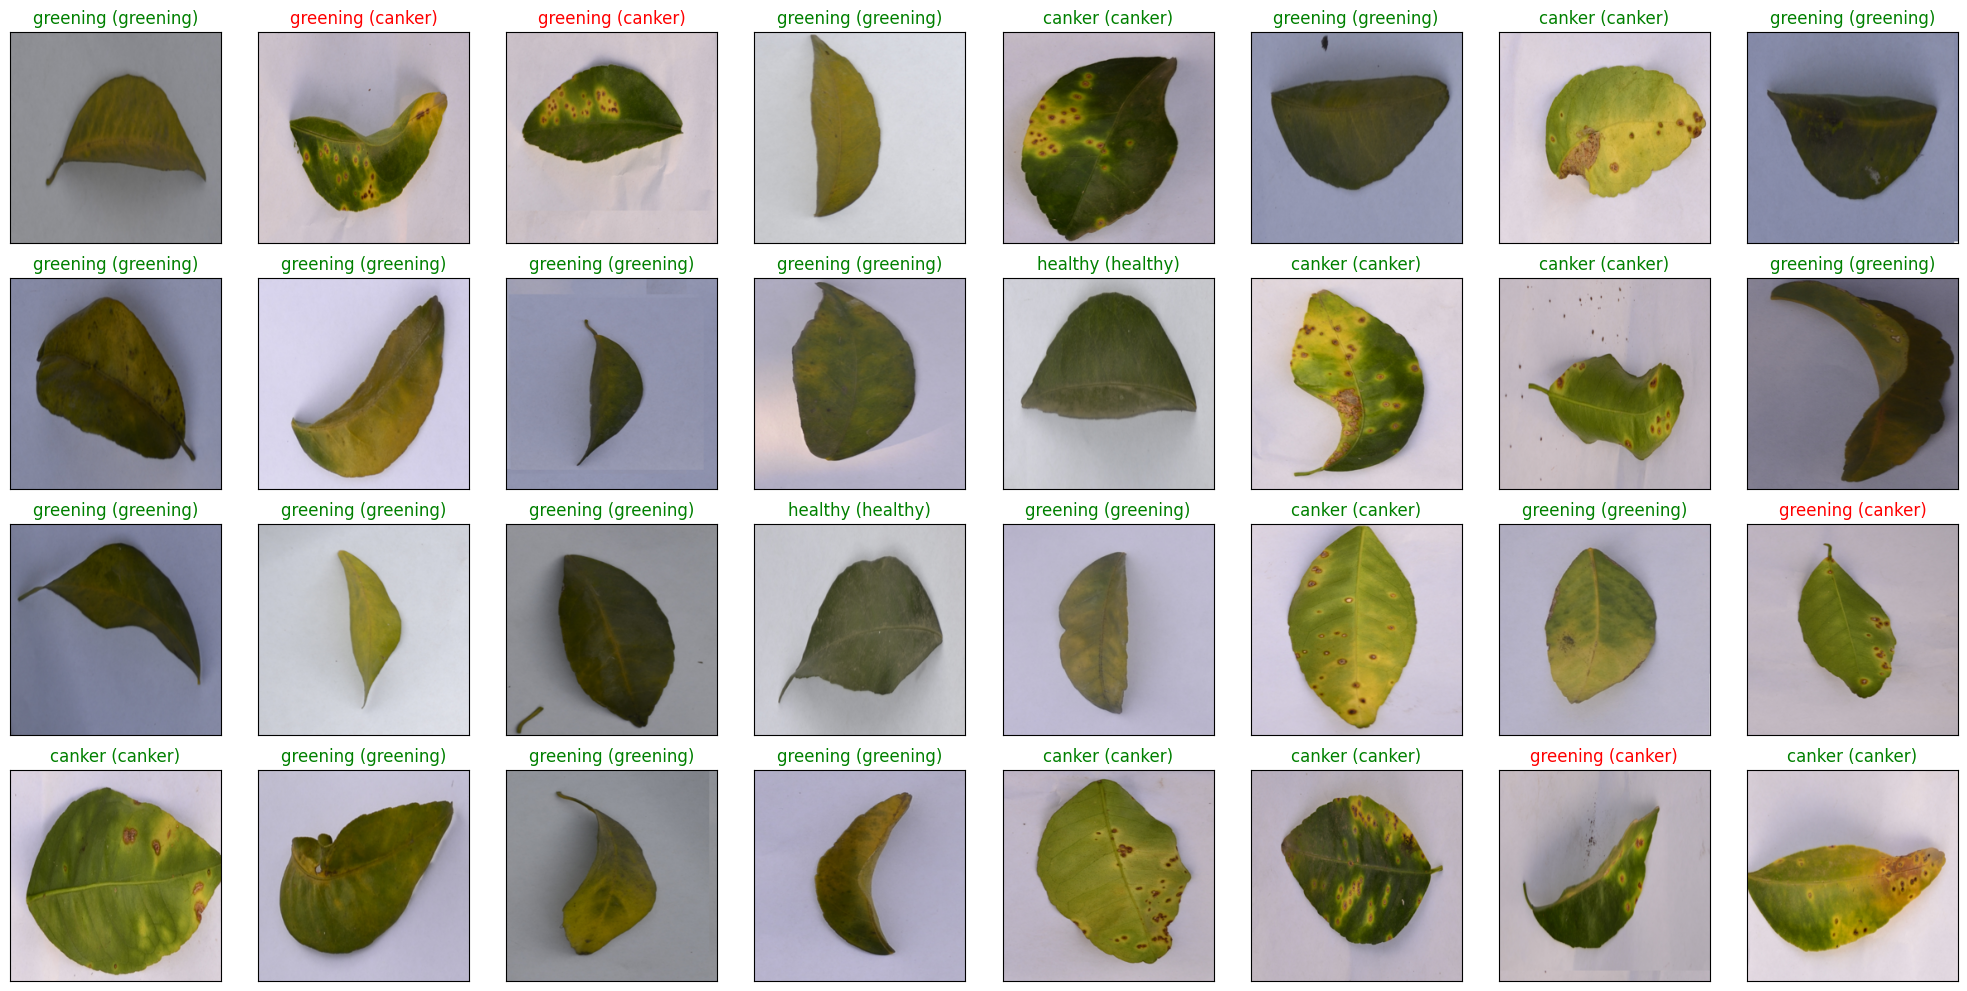

In [70]:
# Get predictions for CNN
test_pred_cnn = model_cnn.predict(x_test)

# Visualize predictions
fig = plt.figure(figsize=(20, 10))
for idx in range(32):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(test_pred_cnn[idx])
    true_idx = y_test[idx]
    ax.set_title(f"{class_names[pred_idx]} ({class_names[true_idx]})",
                 color="green" if pred_idx == true_idx else "red")
plt.tight_layout()
plt.show()


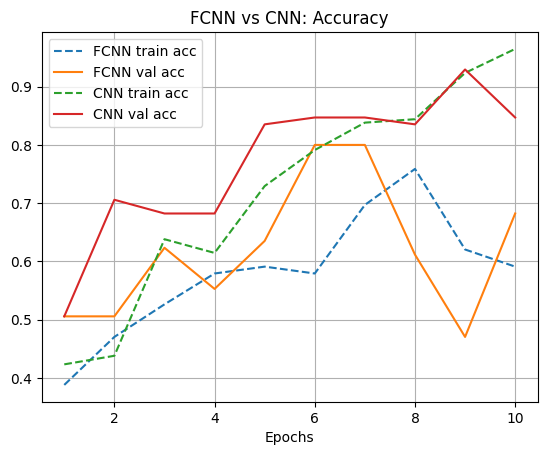

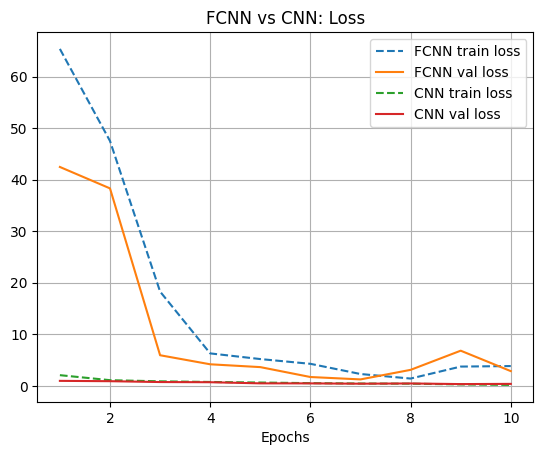

In [71]:
# FCNN vs CNN comparison
# Extract FCNN data
acc_fcnn = history_fcnn.history['accuracy']
val_acc_fcnn = history_fcnn.history['val_accuracy']
loss_fcnn = history_fcnn.history['loss']
val_loss_fcnn = history_fcnn.history['val_loss']

# --- Accuracy comparison
plt.plot(epoch_array, acc_fcnn, label="FCNN train acc", linestyle='--')
plt.plot(epoch_array, val_acc_fcnn, label="FCNN val acc")
plt.plot(epoch_array, acc_cnn, label="CNN train acc", linestyle='--')
plt.plot(epoch_array, val_acc_cnn, label="CNN val acc")
plt.xlabel("Epochs")
plt.title("FCNN vs CNN: Accuracy")
plt.legend()
plt.grid()
plt.show()

# --- Loss comparison
plt.plot(epoch_array, loss_fcnn, label="FCNN train loss", linestyle='--')
plt.plot(epoch_array, val_loss_fcnn, label="FCNN val loss")
plt.plot(epoch_array, loss_cnn, label="CNN train loss", linestyle='--')
plt.plot(epoch_array, val_loss_cnn, label="CNN val loss")
plt.xlabel("Epochs")
plt.title("FCNN vs CNN: Loss")
plt.legend()
plt.grid()
plt.show()
